In [1]:
import numpy as np
import os
from tensorflow import keras
#import pandas as pd
import pickle
from tensorflow.keras.preprocessing import image
import pathlib
import PIL
import matplotlib.pyplot as plt

Functions to preprocess and exctract features from image

In [2]:
#Functions
def preprocess_img(img_path, preprocessing_function):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocessing_function(x)
    return x

def extract_features_from_img(img, model):
    # Use the the transfer learning model to extract features
    features = model.predict(img)
    # Flatten the feature vector
    features = features.flatten()
    return features

def extract_features(path, data_array, model, preprocessing_function):
        for i in os.listdir(path):
            # Path to image
            image_path = os.path.join(path, i)
            
            # Reading and preprocessing image
            x = preprocess_img(image_path, preprocessing_function)
            
            # Extracting features
            features = extract_features_from_img(x, model)
            
            # Store features in the numpy array
            data_array.append(features)
def make_prediction(img_path, model, feature_extractor, preprocessing_function):
     img = preprocess_img(img_path, preprocessing_function)
     features = extract_features_from_img(img, feature_extractor)
     features = features.reshape(1,2048)
     y = model.predict(features)
     if(y>0.5):
          return "MSIMUT"
     else:
          return "MSS"

Load choosen models

In [4]:
#Load feature extraction model
fe_model = keras.models.load_model("../Feature Extraction models/resnet50_model")
#Remove Classifiation Layers
feature_extractor = keras.models.Sequential(fe_model.layers[:-5])

#Load Classification model
#predictor = keras.models.load_model('../Classification models/resnet_mlp')
predictor = pickle.load(open('../Classification models/resnet_rf.pkl', 'rb'))

c:\Users\Matt\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Matt\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Make predictions using the model

In [5]:
import random

#Extract features from data
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocessing
path = pathlib.Path("../Dataset/evaluation")
mss_samples = list(path.glob('MSS/*'))
msi_samples = list(path.glob('MSIMUT/*'))
#extract_features(path,data,model, preprocessing)
#Make prediction
pred_msi=([],[])
pred_mss=([],[])
for i in range(12):
    x = random.randint(0, 999)
    pred_msi[0].append(make_prediction(msi_samples[x], predictor,feature_extractor,preprocessing))
    pred_mss[0].append(make_prediction(mss_samples[x], predictor,feature_extractor,preprocessing))
    pred_msi[1].append(x)
    pred_mss[1].append(x)


1/1 [==============================] - 0s 98ms/step


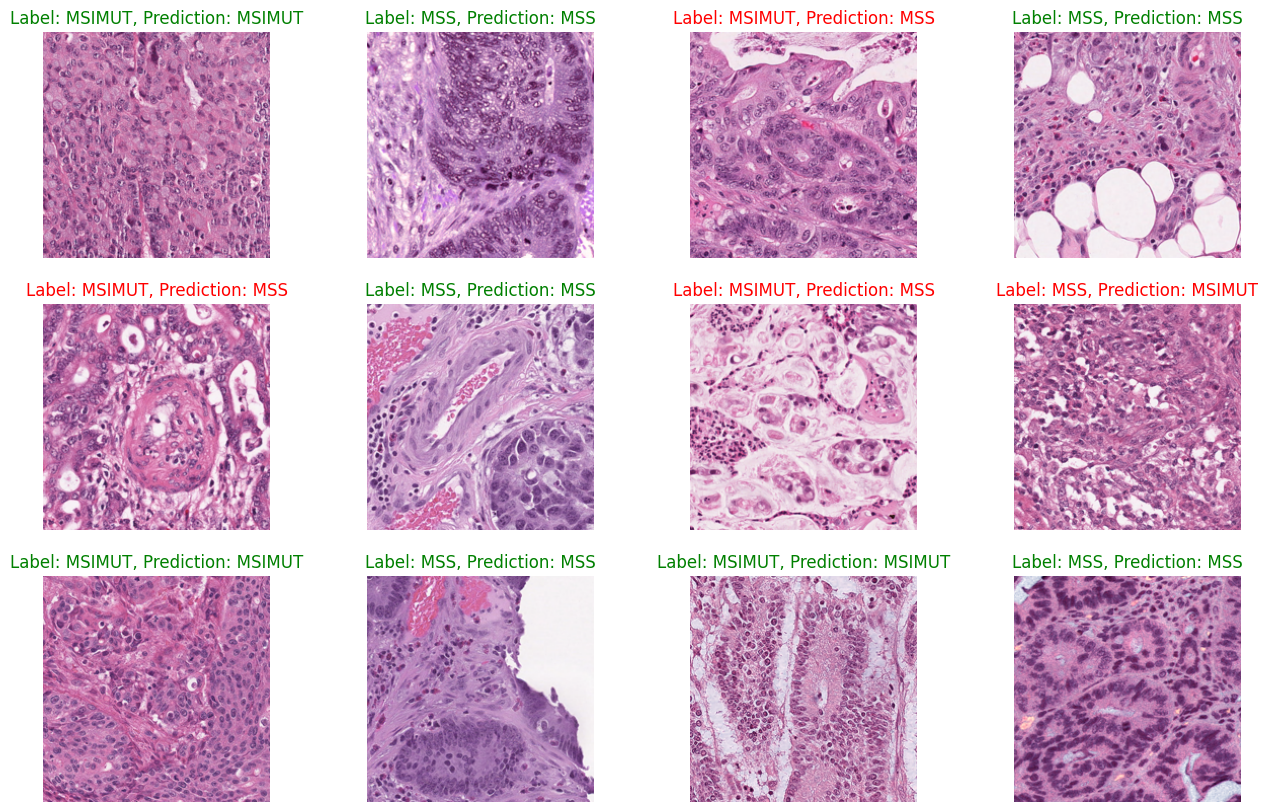

In [10]:

#Show examples of original images
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,10))

for i, ax in enumerate(axes.flat):
    if(i % 2 == 0):
        img = PIL.Image.open(str(msi_samples[pred_msi[1][i]]))
        ax.imshow(img)
        ax.set_title("Label: MSIMUT, Prediction: " + pred_msi[0][i])
        if(pred_msi[0][i]=='MSIMUT'):
            ax.title.set_color("green")
        else:
            ax.title.set_color("red")
        ax.axis('off')
    else:
        img = PIL.Image.open(str(mss_samples[pred_mss[1][i]]))
        ax.imshow(img)
        ax.set_title("Label: MSS, Prediction: " + pred_mss[0][i])
        if(pred_mss[0][i]=='MSS'):
            ax.title.set_color("green")
        else:
            ax.title.set_color("red")
        ax.axis('off')

# Show the grid of images
plt.show()